# Doodle notebook. I dont think anything important is in here but I dont want to delete it


# Calculate eigenvalues over interactino strength and plot

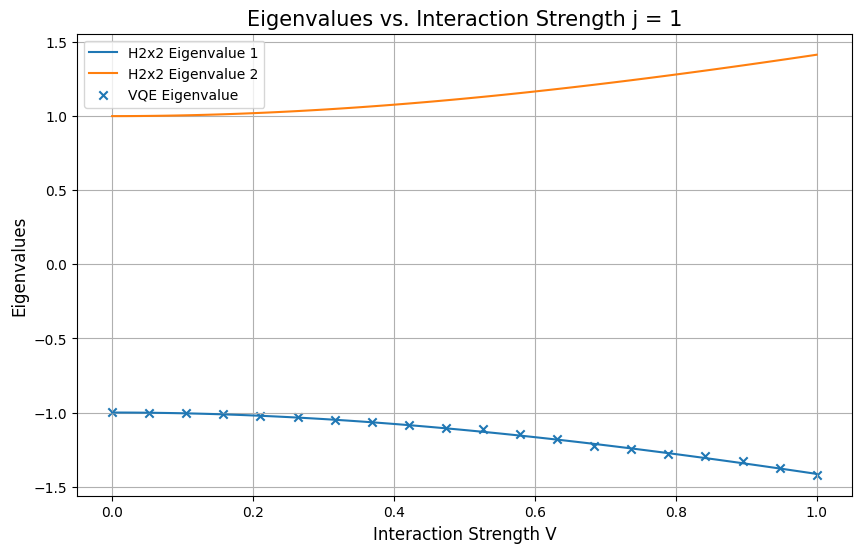

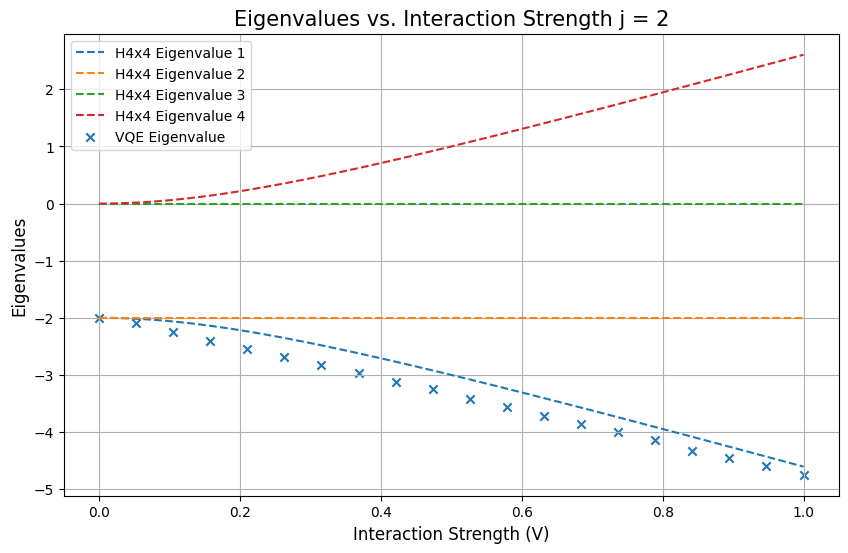

In [48]:
import matplotlib.pyplot as plt
import numpy as np


# Pauli Matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])
e = 1

def H2x2(V):
    return np.array([[-e, -V], [-V, e]])
def H4x4(V):
    return -1* np.kron(I,I) -np.sqrt(6)/2*V*(np.kron(I,X) +np.kron(X,I)-np.kron(X,Z)+np.kron(Z,X)) -1* np.kron(Z,Z)

V_values = np.linspace(0, 1, 100)  # Adjust the range as needed

# Initialize arrays to store eigenvalues
eigenvalues_H2x2 = []
eigenvalues_H4x4 = []

# Compute eigenvalues for each value of V
for V in V_values:
    # Compute eigenvalues for H2x2
    eigenvalues_H2x2.append(np.linalg.eigvalsh(H2x2(V)))
    
    # Compute eigenvalues for H4x4
    eigenvalues_H4x4.append(np.linalg.eigvalsh(H4x4(V)))

# Convert lists to arrays for easier manipulation
eigenvalues_H2x2 = np.array(eigenvalues_H2x2)
eigenvalues_H4x4 = np.array(eigenvalues_H4x4)

# Plot the eigenvalues as a function of V
plt.figure(figsize=(10, 6))

# Plot eigenvalues for H2x2
for i in range(len(eigenvalues_H2x2[0])):
    plt.plot(V_values, eigenvalues_H2x2[:, i], label=f'H2x2 Eigenvalue {i+1}')
# plot vqe values
VQEV2x2 = np.linspace(0,1,20)
VQEE2x2 = [-0.9994, -1.0015789473684211, -1.005536842105263, -1.0112526315789474, -1.0207052631578948, -1.030863157894737, -1.048578947368421, -1.0610526315789475, -1.087242105263158, -1.1066526315789473, -1.1138947368421053, -1.1431368421052632, -1.1804947368421053, -1.2237578947368422, -1.2454736842105263, -1.2768315789473683, -1.2934842105263158, -1.3302842105263157, -1.3747894736842103, -1.4196]
plt.scatter(VQEV2x2, VQEE2x2,marker = "x", label="VQE Eigenvalue")
plt.xlabel('Interaction Strength V', fontsize = 12)
plt.ylabel('Eigenvalues', fontsize = 12)
plt.title('Eigenvalues vs. Interaction Strength j = 1', fontsize = 15)
plt.legend()
plt.grid(True)
plt.show()
# Plot eigenvalues for H4x4
plt.figure(figsize=(10, 6))
for i in range(len(eigenvalues_H4x4[0])):
    plt.plot(V_values, eigenvalues_H4x4[:, i], linestyle='--', label=f'H4x4 Eigenvalue {i+1}')
# plot vqe values
VQEV4x4 = np.linspace(0,1,20)
VQEE4x4 = [-2.0, -2.0855119368945245, -2.253748356324463, -2.404169692940414, -2.545193800839469, -2.679912310022124, -2.826802301252581, -2.9707831922292973, -3.119898621151921, -3.250081899567893, -3.4190681738677333, -3.5595316133079367, -3.7180070178686364, -3.85401854269334, -4.002030104951505, -4.142950730029949, -4.327119646376929, -4.458169042234308, -4.5955301129519865, -4.746846927516163]
plt.scatter(VQEV4x4, VQEE4x4,marker = "x", label="VQE Eigenvalue")
plt.xlabel('Interaction Strength (V)', fontsize = 12)
plt.ylabel('Eigenvalues', fontsize = 12)
plt.title('Eigenvalues vs. Interaction Strength j = 2', fontsize = 15)
plt.legend()
plt.grid(True)
plt.show()

# Find expressions for j = 1 and j = 2 Hamiltonians in terms of pauli matrices

In [34]:
import numpy as np
import itertools

# Define Pauli matrices
I = np.array([[1, 0], [0, 1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
# Define labels for the combinations of Pauli matrices
labels2D = ["".join(combination) for combination in itertools.product("IXYZ", repeat=2)]
labels4D = ["".join(combination) for combination in itertools.product("IXYZ", repeat=4)]
# Create dictionaries to store Kronecker products for 2D and 4D cases
products2D = {}
products4D = {}

# Calculate products and add to dictionary for 2D
for label in labels2D:
    kronecker_product = np.kron(eval(label[0]), eval(label[1]))
    products2D[label] = kronecker_product

# Now for 4D
for label in labels4D:
    kronecker_product = np.kron(eval(label[0]), eval(label[1]))
    for pauli in label[2:]:
        kronecker_product = np.kron(kronecker_product, eval(pauli))
    products4D[label] = kronecker_product

Labels4D = [label for label in products4D.keys() if label.count('Z') == 1 and label.count("I") == 3]
# define quasi spin operators
def Jk(k,dim):
    # k is x y or z. Return sum of all products containing k once and I once
    if dim == 2:
        Labels2D = [label for label in products2D.keys() if label.count(k) == 1 and label.count("I") == 1]
        print(Labels2D)
        summe = 0
        for i in range(2):
            summe += products2D[Labels2D[i]]
        return 1/2*summe
    # return sum of all procuts containing 
    if dim == 4:
        return products4D["ZIII"] +  products4D["ZIII"] +  products4D["ZIII"] +  products4D["ZIII"] 

def Jp(dim):
    if dim == 2:
        return Jk("X",2) + 1j * Jk("Y",2)
    return 1

print(Jp(2))
def Jm(dim):
    if dim == 2:
        return Jk("X",2) - 1j * Jk("Y",2)
    return 1
# define hamiltonian
e = 1; V = 1; W = 0; N = 2
H0 = e*Jk("Z",2); H1 = V/2 * (Jp(2)*Jp(2).T - Jm(2)*Jm(2).T); H2 = W/2 * (-N + Jp(2)*Jm(2) +Jm(2) *Jp(2))
H = H0 + H1 + H2
print("Own H: ",H)
HMorten = e/2*(products2D["ZI"]+products2D["IZ"]) - (W+V)/2 * products2D["XX"]-(W-V)/2*products2D["YY"]
print("Hmorten : ",HMorten)

['IX', 'XI']
['IY', 'YI']
[[0.+0.j 1.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
['IZ', 'ZI']
['IX', 'XI']
['IY', 'YI']
['IX', 'XI']
['IY', 'YI']
['IX', 'XI']
['IY', 'YI']
['IX', 'XI']
['IY', 'YI']
['IX', 'XI']
['IY', 'YI']
['IX', 'XI']
['IY', 'YI']
['IX', 'XI']
['IY', 'YI']
['IX', 'XI']
['IY', 'YI']
Own H:  [[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
Hmorten :  [[ 1.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j -1.+0.j]]


In [4]:
import numpy as np




# Create a dictionary to store Kronecker products
pauli_kronecker = {}

# Loop through the combinations and calculate Kronecker products
for label in labels:
    kronecker_product = np.kron(eval(label[0]), I)
    for pauli in label[1:]:
        kronecker_product = np.kron(kronecker_product, eval(pauli))
    pauli_kronecker[label] = kronecker_product

# Define a function to access Kronecker products by label
def product(label):
    return pauli_kronecker[label]

# Example usage:
H = product('IIIZ') + product('IIIX') + product('IIXI') + product('XIII')  # Example: H = IIIZ + IIIX + IIXI + XIII
print("H =", H)

['IIII', 'IIIX', 'IIIY', 'IIIZ', 'IIXI', 'IIXX', 'IIXY', 'IIXZ', 'IIYI', 'IIYX', 'IIYY', 'IIYZ', 'IIZI', 'IIZX', 'IIZY', 'IIZZ', 'IXII', 'IXIX', 'IXIY', 'IXIZ', 'IXXI', 'IXXX', 'IXXY', 'IXXZ', 'IXYI', 'IXYX', 'IXYY', 'IXYZ', 'IXZI', 'IXZX', 'IXZY', 'IXZZ', 'IYII', 'IYIX', 'IYIY', 'IYIZ', 'IYXI', 'IYXX', 'IYXY', 'IYXZ', 'IYYI', 'IYYX', 'IYYY', 'IYYZ', 'IYZI', 'IYZX', 'IYZY', 'IYZZ', 'IZII', 'IZIX', 'IZIY', 'IZIZ', 'IZXI', 'IZXX', 'IZXY', 'IZXZ', 'IZYI', 'IZYX', 'IZYY', 'IZYZ', 'IZZI', 'IZZX', 'IZZY', 'IZZZ', 'XIII', 'XIIX', 'XIIY', 'XIIZ', 'XIXI', 'XIXX', 'XIXY', 'XIXZ', 'XIYI', 'XIYX', 'XIYY', 'XIYZ', 'XIZI', 'XIZX', 'XIZY', 'XIZZ', 'XXII', 'XXIX', 'XXIY', 'XXIZ', 'XXXI', 'XXXX', 'XXXY', 'XXXZ', 'XXYI', 'XXYX', 'XXYY', 'XXYZ', 'XXZI', 'XXZX', 'XXZY', 'XXZZ', 'XYII', 'XYIX', 'XYIY', 'XYIZ', 'XYXI', 'XYXX', 'XYXY', 'XYXZ', 'XYYI', 'XYYX', 'XYYY', 'XYYZ', 'XYZI', 'XYZX', 'XYZY', 'XYZZ', 'XZII', 'XZIX', 'XZIY', 'XZIZ', 'XZXI', 'XZXX', 'XZXY', 'XZXZ', 'XZYI', 'XZYX', 'XZYY', 'XZYZ', 'XZZI',